Map showing ocean currents in the central Philippines

In [58]:
import xarray as xr
import cartopy.crs as ccrs
import cartopy
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [63]:
lat_lon = xr.open_dataset("CORAL_lat_lon.nc")
lat_lon

lat_subset = lat_lon["lat"].loc[slice(0, 641), slice(0, 1281)]
lat_subset

lon_subset = lat_lon["lon"].loc[slice(0, 641), slice(0, 1281)]
lon_subset

<xarray.DataArray 'lon' (eta_rho: 641, xi_rho: 1281)>
[821121 values with dtype=float64]
Dimensions without coordinates: eta_rho, xi_rho
Attributes:
    long_name:  longitude
    units:      degree_east

In [64]:
lat_lon = xr.open_dataset("CORAL_lat_lon.nc")
lat_lon

<xarray.Dataset>
Dimensions:  (eta_rho: 642, xi_rho: 1282)
Dimensions without coordinates: eta_rho, xi_rho
Data variables:
    lat      (eta_rho, xi_rho) float64 ...
    lon      (eta_rho, xi_rho) float64 ...
Attributes:
    Description:  Lagrangian PDFs for each release sites in the Indonesian Ar...
    Created:      2017-12-29 21:03:27
    title:        Lagrangian PDFs
    history:      Mon Oct 11 11:45:34 2021: ncks -v lat,lon CORAL-connect_25_...
    NCO:          netCDF Operators version 4.9.2 (Homepage = http://nco.sf.ne...

In [25]:
u = xr.open_dataset("CT_ROMS_u_mean_std.nc")
u #length 1281, rows 642
#u_mean = u.CT_ROMS_u_mean
#u_mean
#u_mean

u_mean = u["CT_ROMS_u_mean"].loc[slice(0, 1281), slice(0, 641)]
u_mean


<xarray.DataArray 'CT_ROMS_u_mean' (length: 1281, rows: 641)>
[821121 values with dtype=float32]
Dimensions without coordinates: length, rows

In [27]:
v = xr.open_dataset("CT_ROMS_v_mean_std.nc")
v #length 1282, rows 641
#v_mean = v.CT_ROMS_v_mean
#v_mean

v_mean = v["CT_ROMS_v_mean"].loc[slice(0, 1281), slice(0, 641)]
v_mean


<xarray.DataArray 'CT_ROMS_v_mean' (length: 1281, rows: 641)>
[821121 values with dtype=float32]
Dimensions without coordinates: length, rows

In [48]:
total_speed_squared = np.square(u_mean) + np.square(v_mean)
total_speed = np.sqrt(total_speed_squared)
total_speed

<xarray.DataArray (length: 1281, rows: 641)>
array([[0.16954437, 0.16596116, 0.16323842, ..., 0.        , 0.        ,
        0.        ],
       [0.17312975, 0.17117189, 0.1698502 , ..., 0.        , 0.        ,
        0.        ],
       [0.17302811, 0.1723699 , 0.16958128, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.07977962, 0.08028484, 0.08745535, ..., 0.46203095, 0.45021215,
        0.3928784 ],
       [0.08202103, 0.08155958, 0.08770088, ..., 0.46485415, 0.45534217,
        0.39866498],
       [0.09434567, 0.09473997, 0.09969481, ..., 0.4464407 , 0.44399947,
        0.3870908 ]], dtype=float32)
Dimensions without coordinates: length, rows

In [46]:
coordinates = xr.merge([lat_subset, lon_subset])
coordinates

<xarray.Dataset>
Dimensions:  (eta_rho: 641, xi_rho: 1281)
Dimensions without coordinates: eta_rho, xi_rho
Data variables:
    lat      (eta_rho, xi_rho) float64 ...
    lon      (eta_rho, xi_rho) float64 ...
Attributes:
    long_name:  latitude
    units:      degree_north

In [54]:
velocity_coordinates = xr.merge([coordinates, v_mean, u_mean])
velocity_coordinates

<xarray.Dataset>
Dimensions:         (eta_rho: 641, xi_rho: 1281, length: 1281, rows: 641)
Dimensions without coordinates: eta_rho, xi_rho, length, rows
Data variables:
    lat             (eta_rho, xi_rho) float64 ...
    lon             (eta_rho, xi_rho) float64 ...
    CT_ROMS_v_mean  (length, rows) float32 -0.1646 -0.1612 ... -0.01575 0.002956
    CT_ROMS_u_mean  (length, rows) float32 -0.04074 -0.03955 ... -0.4437 -0.3871
Attributes:
    long_name:  latitude
    units:      degree_north

In [67]:
velocity_coordinates.assign({"total_speed": np.sqrt(np.square(u_mean) + np.square(v_mean))})

<xarray.Dataset>
Dimensions:         (eta_rho: 641, xi_rho: 1281, length: 1281, rows: 641)
Dimensions without coordinates: eta_rho, xi_rho, length, rows
Data variables:
    lat             (eta_rho, xi_rho) float64 ...
    lon             (eta_rho, xi_rho) float64 ...
    CT_ROMS_v_mean  (length, rows) float32 -0.1646 -0.1612 ... -0.01575 0.002956
    CT_ROMS_u_mean  (length, rows) float32 -0.04074 -0.03955 ... -0.4437 -0.3871
    total_speed     (length, rows) float32 0.1695 0.166 0.1632 ... 0.444 0.3871
Attributes:
    long_name:  latitude
    units:      degree_north

In [69]:
np.min(velocity_coordinates.CT_ROMS_v_mean)
np.max(velocity_coordinates.CT_ROMS_v_mean)

<xarray.DataArray 'CT_ROMS_v_mean' ()>
array(1.49039876)

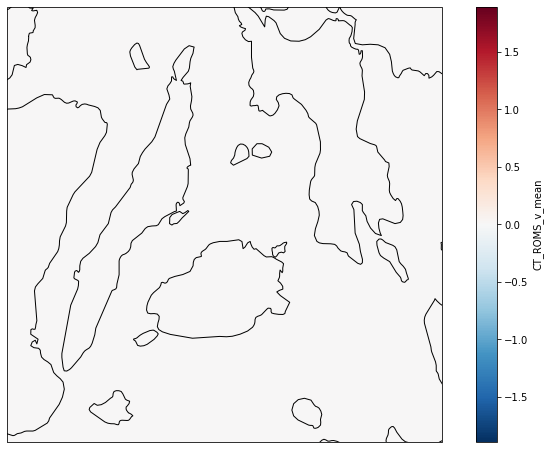

In [66]:
extent = [123, 125.5, 9, 11.5]

plt.figure(figsize=(12,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.LAND)
ax.set_extent(extent)

velocity_coordinates.CT_ROMS_v_mean.plot(transform=ccrs.PlateCarree(), vmin=-4000, vmax=2000)

AttributeError: 'Dataset' object has no attribute 'total_speed'

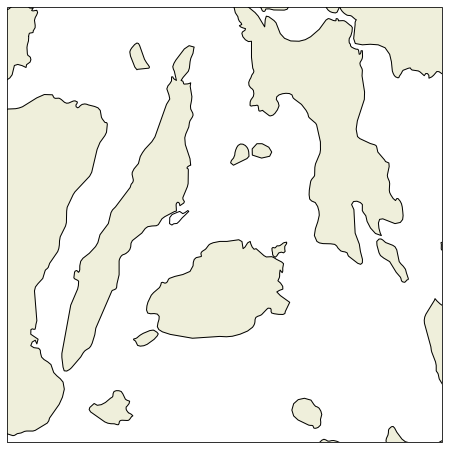

In [70]:
extent = [123, 125.5, 9, 11.5]

plt.figure(figsize=(12,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.LAND)
ax.set_extent(extent)

velocity_coordinates.total_speed.plot(transform=ccrs.PlateCarree())